In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 
from sklearn.decomposition import PCA

In [2]:
fraud = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [3]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# changing isFraud column to a categorical data type
fraud['isFraud'] = fraud['isFraud'].astype("category")

In [7]:
# observe the amount of fraud counts this column 
fraud['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
# observe the amount of fraud counts this column 
fraud['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Since the 'isFlagedFraud' column had 8000+ missing fraud counts, we are going to drop this column.

In [9]:
# dropping the 'isFlaggedFraud' column
fraud_new = fraud.drop(['isFlaggedFraud', 'step'], axis = 1)

In [10]:
fraud_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   type            object  
 1   amount          float64 
 2   nameOrig        object  
 3   oldbalanceOrg   float64 
 4   newbalanceOrig  float64 
 5   nameDest        object  
 6   oldbalanceDest  float64 
 7   newbalanceDest  float64 
 8   isFraud         category
dtypes: category(1), float64(5), object(3)
memory usage: 394.4+ MB


In [ ]:
#Groupby type
fraud_new.groupby('type')['isFraud'].sum()

In [11]:
fraud_new = fraud_new.sample(n=50000)

In [12]:
fraud_new.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2756117,CASH_OUT,55927.11,C91071084,0.00,0.00,C1746219350,1048520.20,1104447.31,0
4057875,PAYMENT,29122.09,C393762821,0.00,0.00,M2027704414,0.00,0.00,0
2280857,PAYMENT,3869.64,C2079721859,151596.28,147726.64,M1634590148,0.00,0.00,0
6254632,CASH_IN,174386.75,C181101377,4059153.48,4233540.23,C214774813,73993503.45,73819116.70,0
2191412,TRANSFER,303014.67,C57948388,11069.00,0.00,C1978381162,680884.12,983898.79,0


In [13]:
fraud_new.shape

(50000, 9)

# Univariate Analysis

We want to gather some visualization analysis to help us understand the dataframe more

/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_856/3156357791.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_856/3156357791.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_856/3156357791.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/0_/bh771p3x6hb6g0t8b2hm6kch0000gp/T/ipykernel_856/3156357791.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


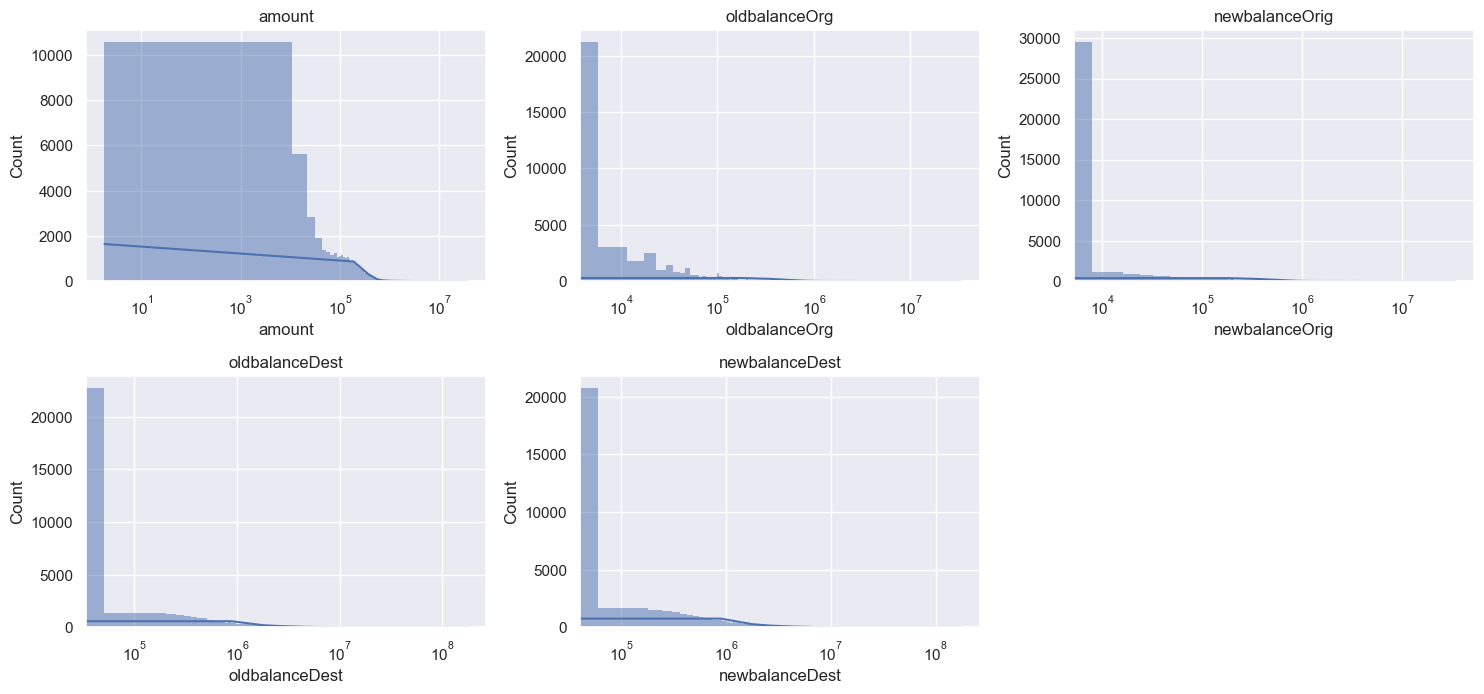

In [14]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = fraud_new.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(fraud_new[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()


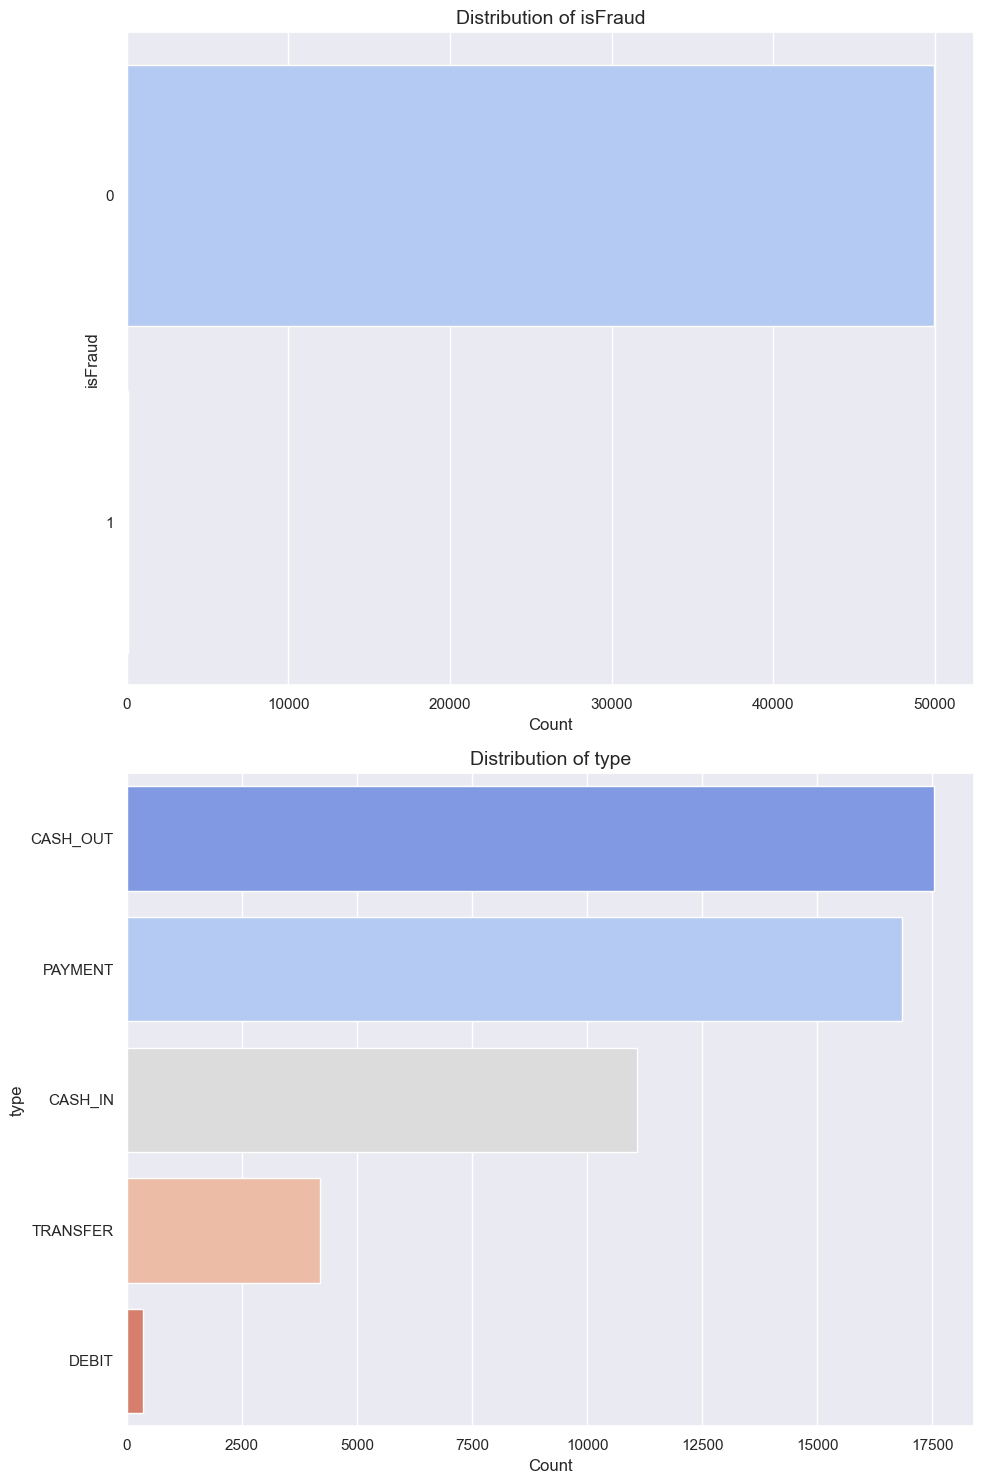

In [15]:
# Univariate Analysis: Categorical variables
categorical_columns = ['isFraud', 'type']

# Plotting distributions of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(y=fraud_new[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

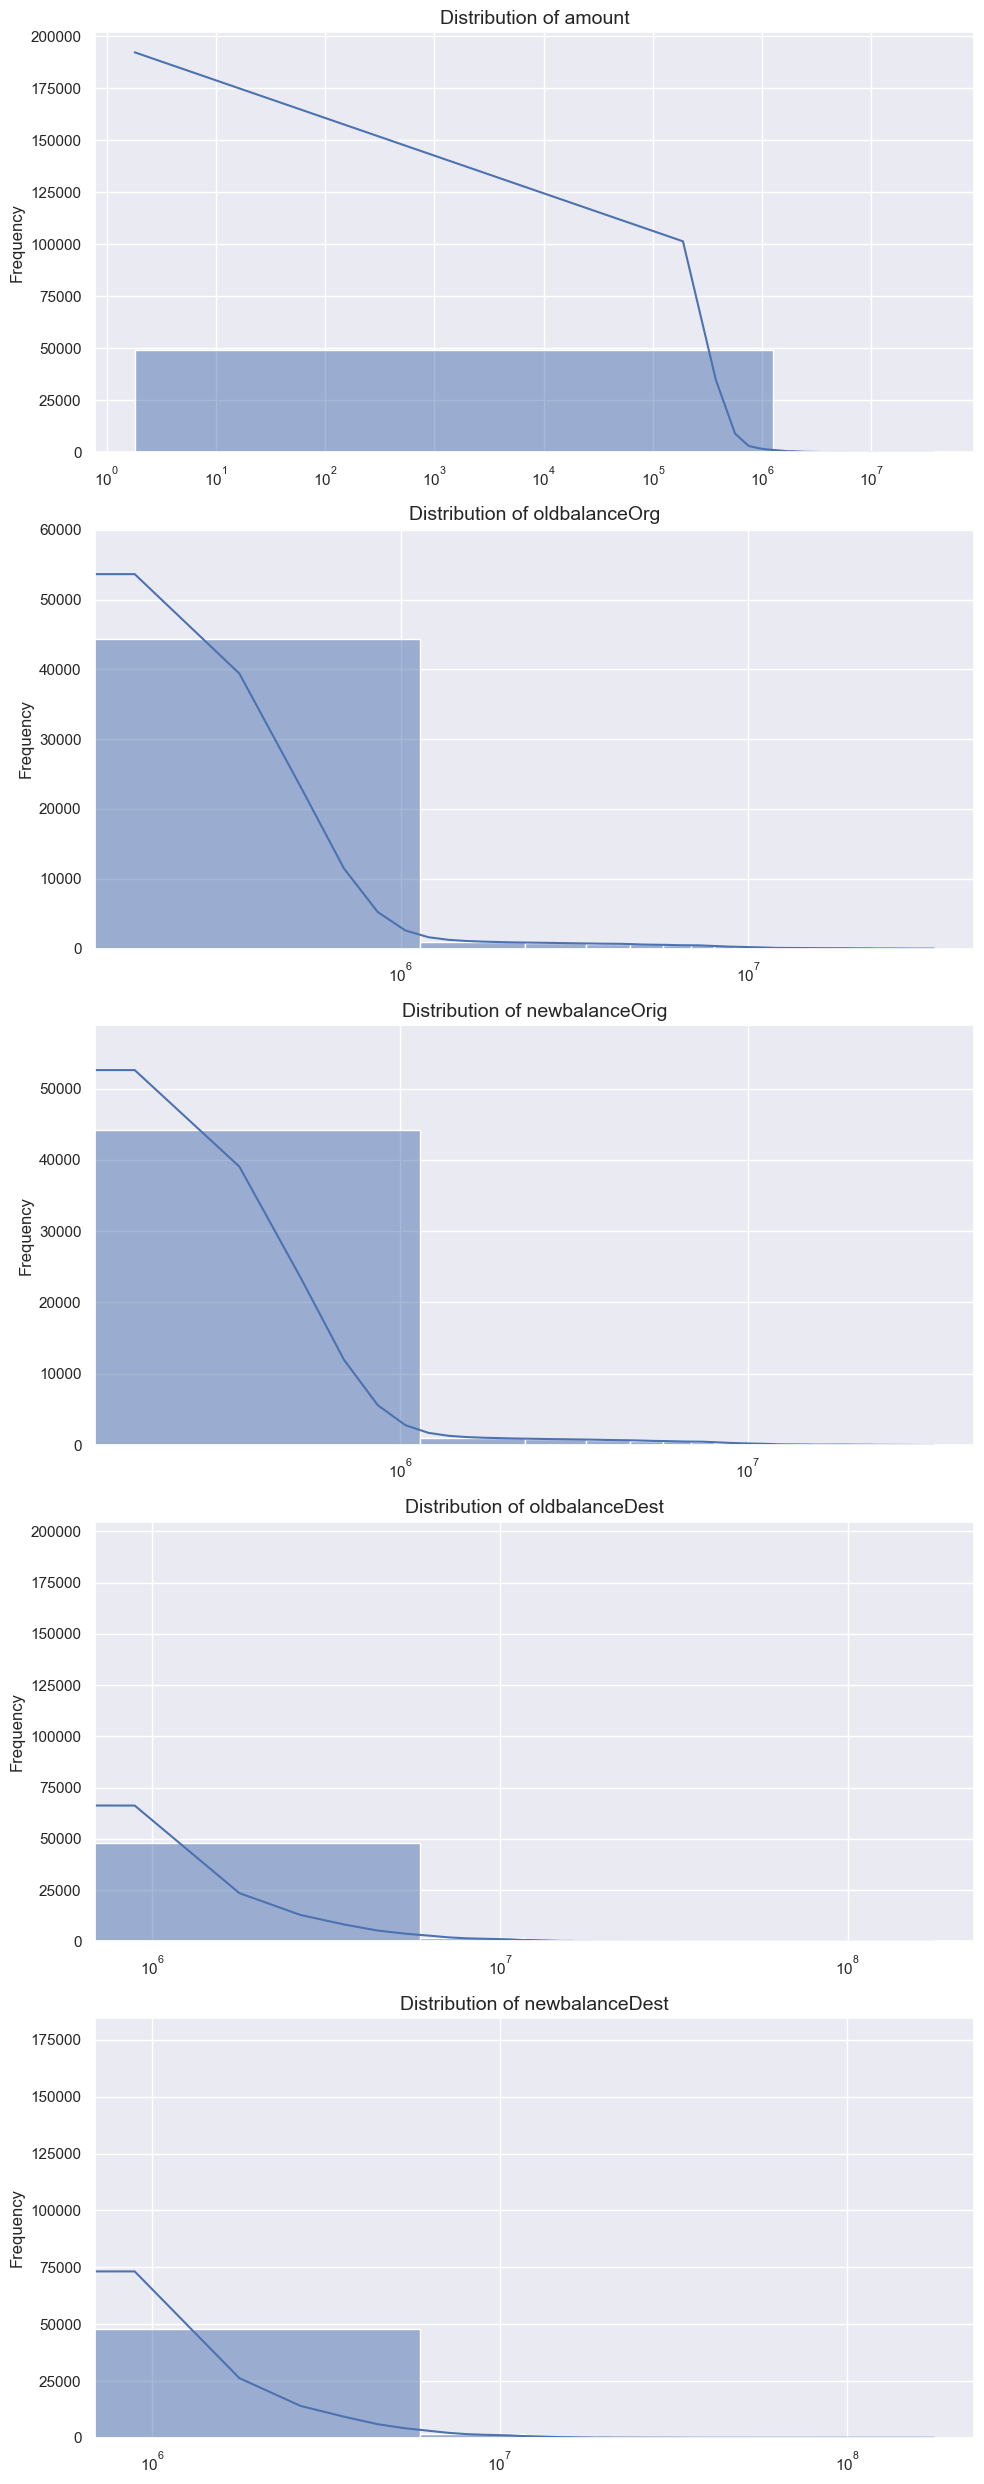

In [16]:
# Set up the matplotlib figure
sns.set(style="darkgrid")

# Univariate Analysis: Numeric variables
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plotting distributions of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 25))

for i, col in enumerate(numeric_columns):
    sns.histplot(fraud_new[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_xscale('log')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<Axes: xlabel='type', ylabel='Count'>

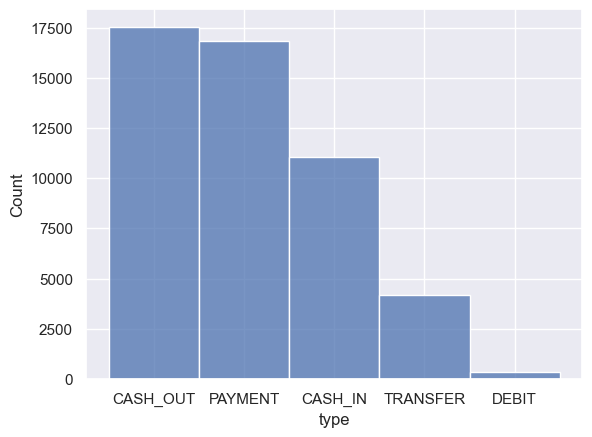

In [17]:
# plot a seaborn histogram for the type column in the fraud dataframe
sns.histplot(data = fraud_new, x = 'type')

<Axes: xlabel='isFraud', ylabel='Count'>

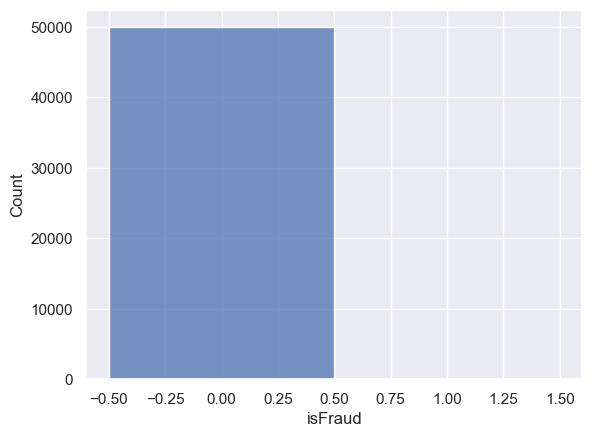

In [18]:
# plot a seaborn histogram for the isFraud column in the fraud dataframe
sns.histplot(data = fraud_new, x = 'isFraud')

There are only a few columns we can gather some univariate analysis from. 

# Bivariate Analysis

Generating visualization for relationships between various variables to understand the patterns that are present in the dataset.

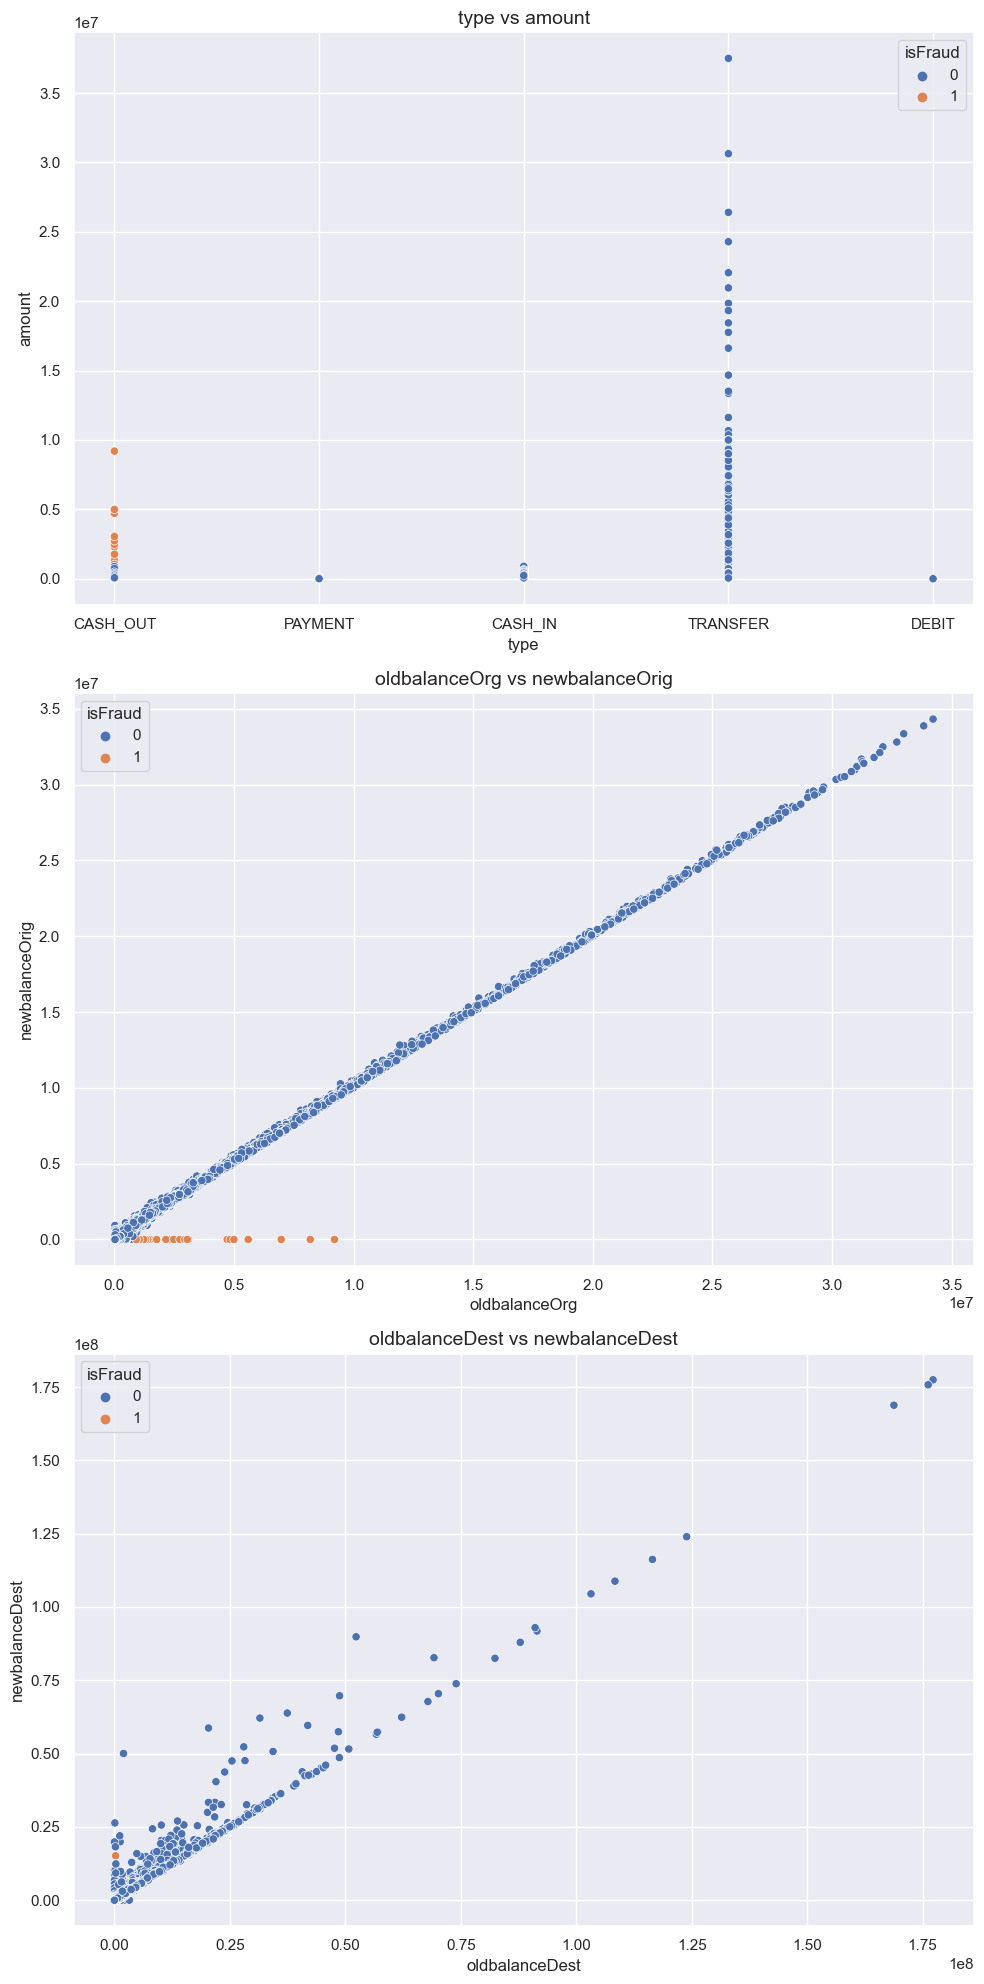

In [19]:
# Bivariate Analysis: Examining relationships between key pairs of variables

# Selecting some key variables for bivariate analysis
key_pairs = [
    ('type', 'amount'), 
    ('oldbalanceOrg', 'newbalanceOrig'), 
    ('oldbalanceDest', 'newbalanceDest'),
]

# Plotting scatter plots for these pairs
fig, axes = plt.subplots(nrows=len(key_pairs), ncols=1, figsize=(10, 20))

for i, (x, y) in enumerate(key_pairs):
    sns.scatterplot(data=fraud_new, x=x, y=y, ax=axes[i], hue='isFraud')
    axes[i].set_title(f'{x} vs {y}', fontsize=14)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()

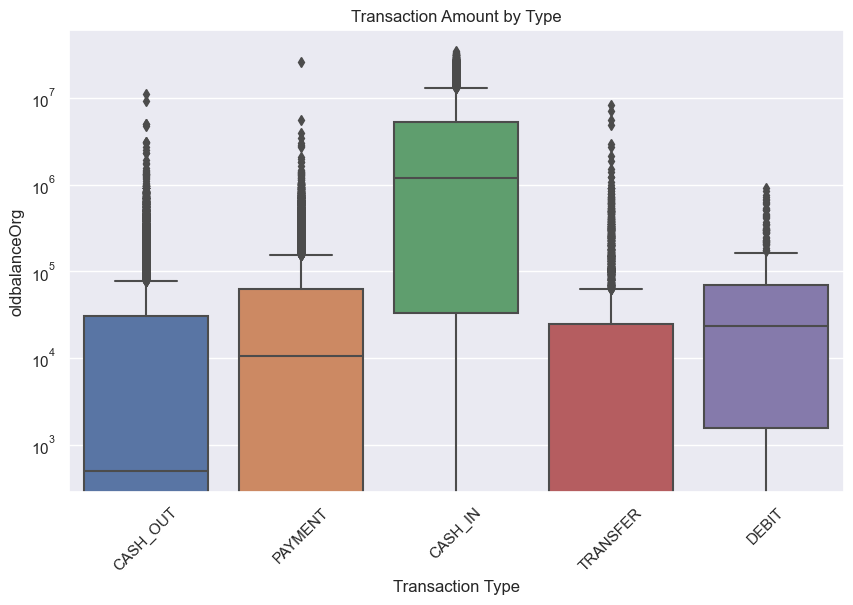

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='oldbalanceOrg', data=(fraud_new))
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.yscale('log')
plt.ylabel('oldbalanceOrg')
plt.xticks(rotation=45)  
plt.show()

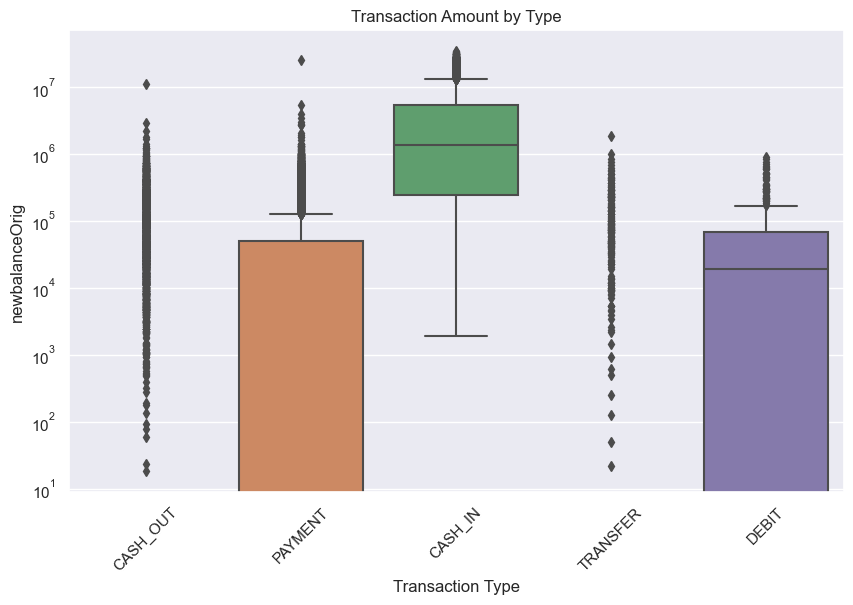

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='newbalanceOrig', data=(fraud_new))
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.yscale('log')
plt.ylabel('newbalanceOrig')
plt.xticks(rotation=45)  
plt.show()

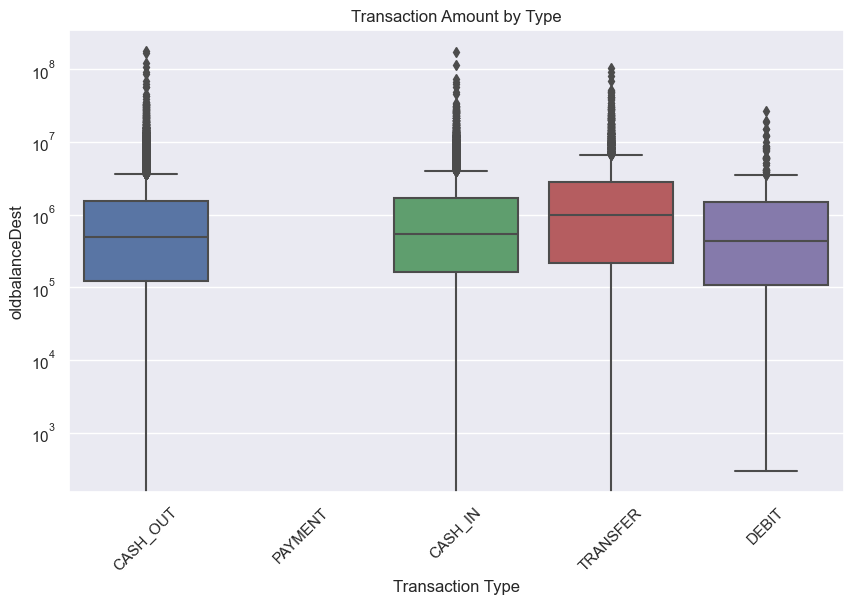

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='oldbalanceDest', data=(fraud_new))
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.yscale('log')
plt.ylabel('oldbalanceDest')
plt.xticks(rotation=45)  
plt.show()

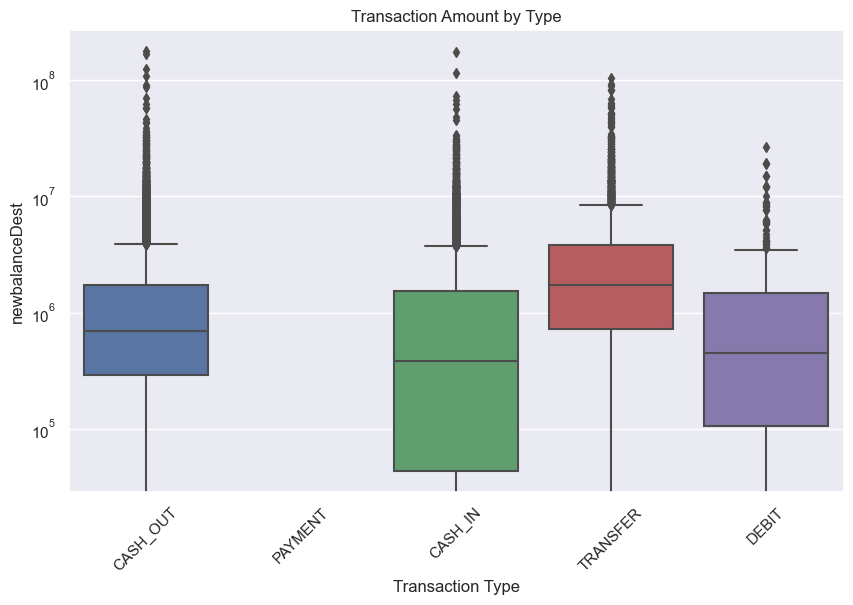

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='newbalanceDest', data=(fraud_new))
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.yscale('log')
plt.ylabel('newbalanceDest')
plt.xticks(rotation=45)  
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

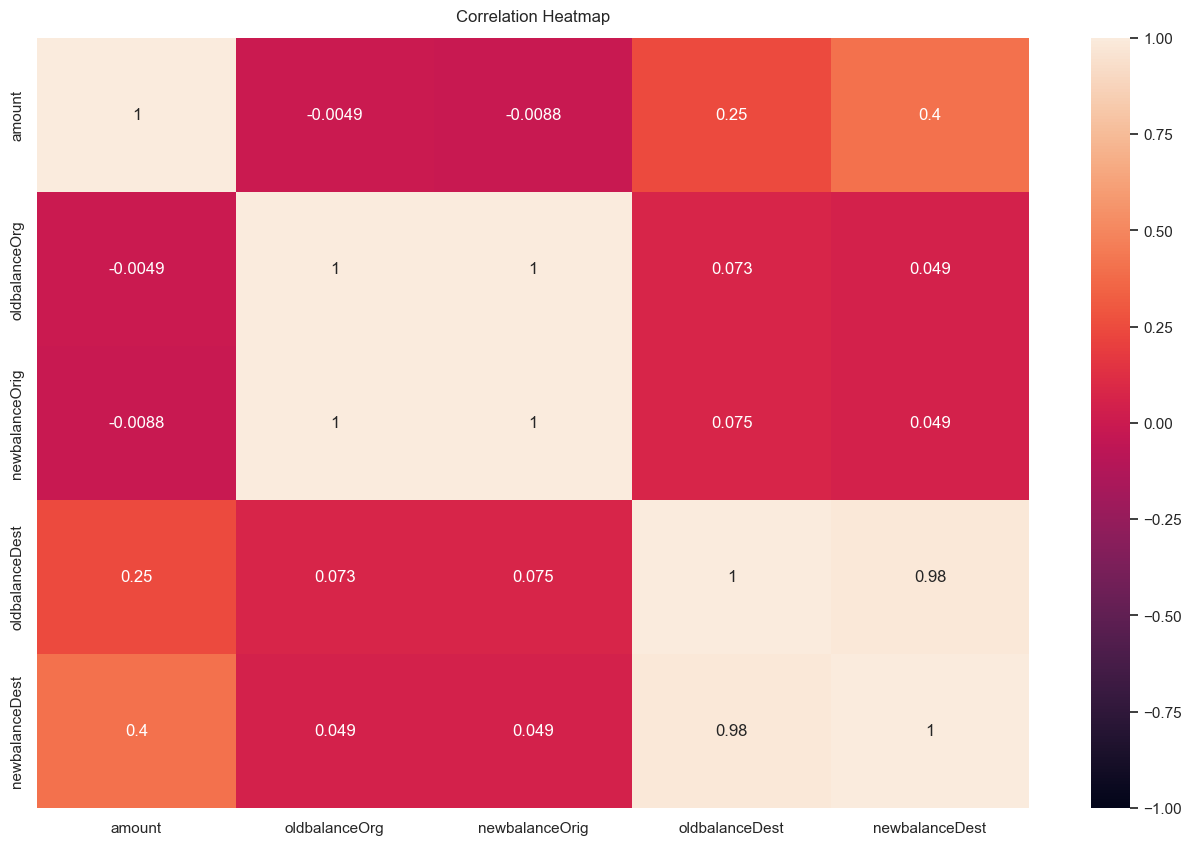

In [24]:
#Correlation Heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(fraud_new.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [25]:
fraud_new.to_csv('../data/fraud_condensed.csv')